In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# 1. Data Loading and Cleaning
df = pd.read_csv(r"C:\Users\syedn\Downloads\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [18]:
# 2. Feature Engineering (Handling Categorical Variables)

# Binary columns (yes/no): Convert to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Multi-level categorical column: furnishingstatus
# Use get_dummies for one-hot encoding, and drop the original column
furnishing_status_dummies = pd.get_dummies(df['furnishingstatus'], prefix='furnishing', drop_first=True)
df = pd.concat([df, furnishing_status_dummies], axis=1)
df.drop('furnishingstatus', axis=1, inplace=True)

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']


In [19]:
# 3. Data Scaling
# Initialize and apply the MinMaxScaler to all features
scaler = MinMaxScaler()
cols_to_scale = X.columns
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=cols_to_scale)
X_scaled_df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,1.0
541,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
543,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [20]:
# 4. Model Building
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=100)
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Predict on the test set
y_pred = lr.predict(X_test)



In [21]:
# 5. Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("--- Model Performance Metrics ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



--- Model Performance Metrics ---
R-squared (R²): 0.6730
Mean Squared Error (MSE): 1283969782447.75
Root Mean Squared Error (RMSE): 1133123.90


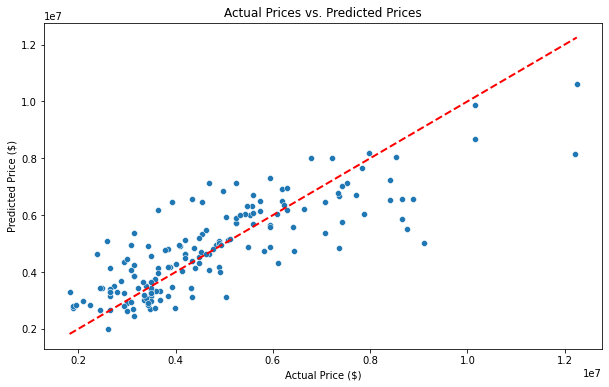

In [22]:
# Visualize Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.savefig('actual_vs_predicted.png')



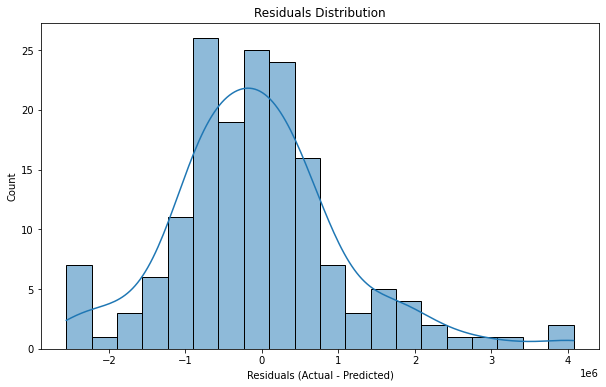

In [23]:
# Visualize Residuals (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.savefig('residuals_distribution.png')


In [24]:
# Interpret the Coefficients
coefficients = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coefficient'])
coefficients['Absolute_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False).drop('Absolute_Coefficient', axis=1)
print("\n--- Feature Importance (Coefficients) ---")
print(coefficients)


--- Feature Importance (Coefficients) ---
                            Coefficient
area                       3.470239e+06
bathrooms                  3.306012e+06
stories                    1.253356e+06
hotwaterheating            9.801708e+05
airconditioning            7.724748e+05
parking                    7.014931e+05
prefarea                   6.863920e+05
mainroad                   5.825986e+05
bedrooms                   5.397838e+05
furnishing_unfurnished    -3.581148e+05
guestroom                  3.514464e+05
basement                   2.494209e+05
furnishing_semi-furnished  1.063202e+04
